# Homework on SVMs and Spectral Clustering


------------------------------------------------------
*Machine Learning II. Master in Big Data Analytics*

*Emilio Parrado Hernández eparrado@ing.uc3m.es*

------------------------------------------------------



In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Introduction

The key to the success of a supervised learning algorithm is the number and quality of the labels. Collecting labelled examples can be costly and difficult in some applications. In this assignment you will simulate an scenario in which labels are scarce. You will study the impact of the number of available labels in the results and explore a strategy to try to achieve good results with a reduced number of labelled examples.

You will work with the MNIST data that we used in the SVM lab session. We have prepared two binary problems of different nature with these data. 

You can use the values for the SVM parameters `C=100` and `gamma=0.001` found in that corresponding lab session.

# 1. SVM with randomly selected labels

The first result is to analize the changes in performance of the SVM as the number of available labelled examples increases. The data for the first problem that you will study is in files "x_01.csv" and "y_01.csv". This problem consists in to separate 0s from 1s.



The code in the following cell loads these data and plots some of the examples.

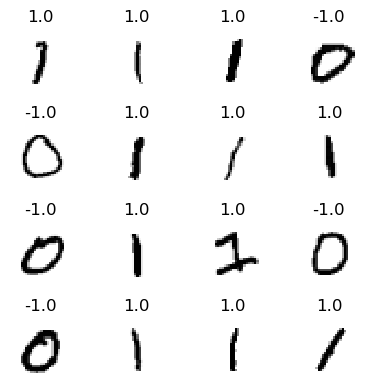

In [21]:
Y = np.loadtxt("y_01.csv", 
                       delimiter=",") 
X = np.loadtxt("x_01.csv", 
                       delimiter=",")

nrows = 4
ncols = 4
ff,aa = plt.subplots(nrows, ncols,figsize=(4,4))
ii = 0
for rr in range(nrows):
    for cc in range(ncols):
        aa[rr][cc].set_axis_off()
        aa[rr][cc].imshow(X[ii].reshape(28,28), 
                          cmap=plt.cm.gray_r, 
                          interpolation='nearest')
        aa[rr][cc].set_title(repr(Y[ii]))
        ii += 1
ff.tight_layout()  

It seems a reasonably easy classification in terms of the separability of the classes. Therefore, it should be easy to achieve good classification results with a training dataset of relative small size. 

You are now analizing how the results of the SVM improve as you get more and more labelled  data. In the next cell implement python code that peforms the following functionalities.

- Run a `for` loop for all the values in the np.array `v_num_labels`. Let's say in iteration `nn` of the loop  `num_data = v_num_labels[nn]`
    - construct a training set of `num_data` observations by sampling at random `num_data` rows of `X` and the corresponding elements of `Y` as true labels. In this iteration of the loop you are simulating you only have labels for these `num_data` observations, therefore you can only use these observations to fit the SVM.
    - train a SVM with this training subset of size `num_data`
    - evaluate this SVM with `X` and `Y` and store the result in the position `nn` of `acc_svm_random_label`. Here you are using the whole dataset, but just for evaluation and reporting purposes, not for fitting the model.
    
- Plot `acc_svm_random_label` vs `v_num_labels` and discuss the impact of the number of available labelled examples in the classification accuracy

---

**Note**

It could happen that, specially for the smallest values of `v_num_lables`, all the `ll` samples belong to the same class. In that case store a $0.5$ in the corresponding position of `acc_svm_random_label` since you would think all the observations belong to a same class and therefore only half of the observations in `X` will get a correct classification.

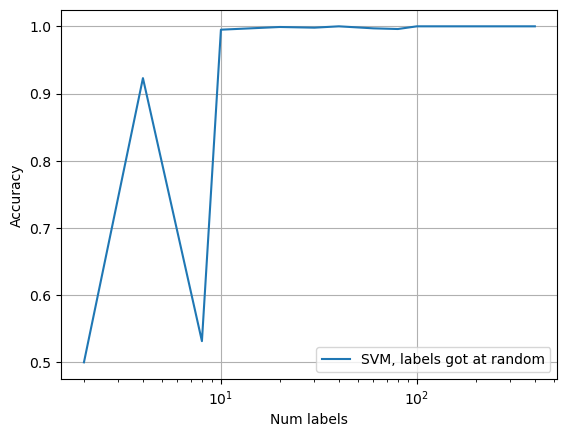

In [22]:
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt

# Load data
X = pd.read_csv('x_01.csv').to_numpy()
Y = pd.read_csv('y_01.csv').to_numpy().ravel()

# Define parameters
C = 100
gamma = 0.001

# Define the number of labelled samples
v_num_labels = np.array([2, 4, 8, 10, 20, 30, 40, 60, 80, 100, 200, 300, 400])

# Initialize array to store accuracy values
acc_svm_random_label = np.empty(len(v_num_labels))

# Loop through different numbers of labelled samples
for nn, num_data in enumerate(v_num_labels):
    # Randomly select num_data training examples
    idx = np.random.choice(len(X), size=num_data, replace=False)
    X_train = X[idx]
    Y_train = Y[idx]
    
    # Check if both classes are present in the sampled data
    unique_classes = np.unique(Y_train)
    if len(unique_classes) < 2:
        acc_svm_random_label[nn] = 0.5  # Set accuracy to 0.5 for random guessing
    else:
        # Train SVM with the selected training examples
        clf = svm.SVC(kernel='rbf', C=C, gamma=gamma)
        clf.fit(X_train, Y_train)
    
        # Evaluate the SVM using the entire dataset
        accuracy = clf.score(X, Y)
        acc_svm_random_label[nn] = accuracy

# Plot accuracy vs number of labels
plt.figure()
plt.plot(v_num_labels, acc_svm_random_label, label='SVM, labels got at random')
plt.legend()
plt.xlabel('Num labels')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.grid()
plt.show()


To get a more robust statistical significance of the results, in the next cell run the above loop a number of `NSIM` times, storing the results in the 2D array `acc_svm_random_label`. Then plot the mean of `acc_svm_random_label` and one standard deviation

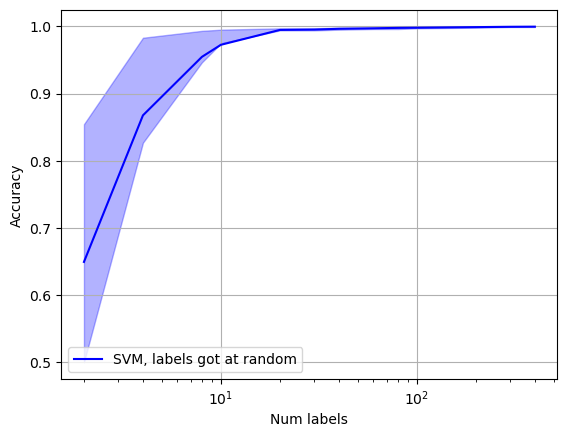

In [23]:
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt

# Load data
X = pd.read_csv('x_01.csv').to_numpy()
Y = pd.read_csv('y_01.csv').to_numpy().ravel()

# Define parameters
C = 100
gamma = 0.001

# Define the number of labelled samples
v_num_labels = np.array([2, 4, 8, 10, 20, 30, 40, 60, 80, 100, 200, 300, 400])
NSIM = 100
acc_svm_random_label = np.empty((NSIM, len(v_num_labels)))  # each row is for each of the NSIM simulations

# Loop through different simulations
for sim in range(NSIM):
    # Loop through different numbers of labelled samples
    for nn, num_data in enumerate(v_num_labels):
        # Randomly select num_data training examples
        idx = np.random.choice(len(X), size=num_data, replace=False)
        X_train = X[idx]
        Y_train = Y[idx]

        # Check if both classes are present in the sampled data
        unique_classes = np.unique(Y_train)
        if len(unique_classes) < 2:
            acc_svm_random_label[sim, nn] = 0.5  # Set accuracy to 0.5 for random guessing
        else:
            # Train SVM with the selected training examples
            clf = svm.SVC(kernel='rbf', C=C, gamma=gamma)
            clf.fit(X_train, Y_train)

            # Evaluate the SVM using the entire dataset
            accuracy = clf.score(X, Y)
            acc_svm_random_label[sim, nn] = accuracy

# Plot mean and standard deviation of accuracy
plt.figure()
plt.plot(v_num_labels, np.mean(acc_svm_random_label, axis=0), label='SVM, labels got at random', color='blue')
plt.fill_between(v_num_labels, np.percentile(acc_svm_random_label, 25, axis=0),
                 np.percentile(acc_svm_random_label, 75, axis=0),
                 color='blue', alpha=0.3)
plt.legend()
plt.xlabel('Num labels')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.grid()
plt.show()

**Discuss the uncertainty of the results depending of the number of available labels to train the SVM.**

### YOUR DISCUSSION HERE
The uncertainty of the results, as indicated by the spread or standard deviation in the accuracy measurements, depends significantly on the number of available labels used to train the SVM. Here's how the uncertainty varies with the number of available labels:

High Uncertainty with Few Labels:s:When the number of available labels is small, the uncertainty in the accuracy measurements tends to be high. This is because the SVM model's performance heavily relies on the limited information it receives during training. With a small number of labelled examples, the model may not capture the true underlying patterns in the data, leading to high variability in accuracy across different runs or simulations.
Decreasing Uncertainty with More Labels:

As the number of available labels increases, the uncertainty in the accuracy measurements tends to decrease. With more labelled examples, the SVM model has a better opportunity to learn and generalize from the data. As a result, the model's performance becomes more stable across different runs or simulations, leading to lower variability in accuracy measurements.
Plateauing of Uncertainty:

There may be a point where the uncertainty levels off or plateaus, indicating diminishing returns in terms of reducing uncertainty with additional labelled examples. This plateauing effect occurs when the model has already captured most of the relevant information from the data, and further increases in the number of labels provide marginal improvements in performance.
Optimal Trade-off Between Uncertainty and Labeling Cost:

There's often a trade-off between the uncertainty of the results and the cost of obtaining labelled data. While increasing the number of labelled examples can reduce uncertainty, it also incurs additional costs in terms of data collection, labelling, and processing. Therefore, it's essential to find an optimal balance between the uncertainty of the results and the associated costs.
Interpretation of Uncertainty:

It's crucial to interpret the uncertainty in the context of the specific problem and application. High uncertainty may indicate inherent complexity or noise in the data, which could require more sophisticated modelling techniques or feature engineering. Conversely, low uncertainty may suggest that the model has successfully captured the underlying patterns in the data, providing more reliable predictions.
In summary, the uncertainty of SVM results depends on the number of available labels used to train the model. Understanding this relationship helps practitioners make informed decisions about data collection, model training, and result interpretation in supervised learning tasks.

# 2.- Spectral Clustering with one label per cluster

Clustering is an unsupervised learning paradigm. It means we can use clustering algorithms with unlabelled data. A way of doing a classification with a very constrained budget for labels could be the following. Imagine you can afford `num_data` labels:
- Run a clustering algorithm and split your data in `num_data` clusters. We (optimistically) assume each cluster will be homogeneous (all the data in a same cluster should be assigned to a same class)
- Now run a loop for all the clusters to classify the data of the samples
    - Select one of the samples in each cluster and ask for its label, call `y_cluster` this label
    - Use that label to classify all the observations that belong to this cluster.

In the cell below complete the python code of function `my_spectral_clustering`. This function implements this classification scheme using [SpectralClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html) as clustering method.

Now use the function `my_spectral_clustering` to find out the performance of this proposed classification method based in clustering with a reduced number of labels using the number of clusters indicated by `v_num_labels` and a value of `gamma=0.001` for the RBF kernel of the spectral clustering. 

In [12]:
from sklearn.cluster import SpectralClustering
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

class oracle(object):
    """
    Simulates an oracle that provides labels for input observations. 
    """
    def __init__(self, x, y):
        self.dim = x.shape[1]
        self.knn = KNeighborsClassifier(n_neighbors=1).fit(x, y)
        
    def get_label(self, x):
        return self.knn.predict(x.reshape(-1, self.dim))
    
def my_spectral_clustering(x, my_oracle, n_clusters=2, gamma=1):
    """
    Implements classification scheme using Spectral Clustering and a very limited number of labels.
    """
    Nt = x.shape[0]
    # Fit Spectral Clustering
    spectral = SpectralClustering(n_clusters=n_clusters, affinity='rbf', gamma=gamma, assign_labels='kmeans', random_state=0)
    cluster_labels = spectral.fit_predict(x)
    
    predictions = np.empty(Nt) # Array to fill with the predicted class for all instances in x
    
    for cc in range(n_clusters):
        # Get the instances that are in cluster cc
        indices = np.where(cluster_labels == cc)[0]
        if len(indices) > 0:
            # Pick one of these instances at random and call it my_x
            random_index = np.random.choice(indices)
            my_x = x[random_index]
            
            # Get the label for my_x from the oracle
            y_cluster = my_oracle.get_label(my_x)
            
            # Fill the positions of the instances in cluster cc in the array predictions with y_cluster
            predictions[indices] = y_cluster
    
    return predictions


In [13]:
v_num_labels = np.array([2,4,8,10,20,30,40,60,80,100,200,300,400]) # number of labelled samples
acc_spectral_clustering = np.empty(len(v_num_labels))
gamma = 0.001
my_oracle = oracle(X,Y)
for ii,n_clusters in enumerate(v_num_labels):
    predictions = my_spectral_clustering(X, my_oracle, n_clusters=n_clusters, gamma=gamma)
    acc_spectral_clustering[ii] = np.mean(predictions == Y)
    

Plot the classification accuracy of the spectral clustering as a function of the number of available labels

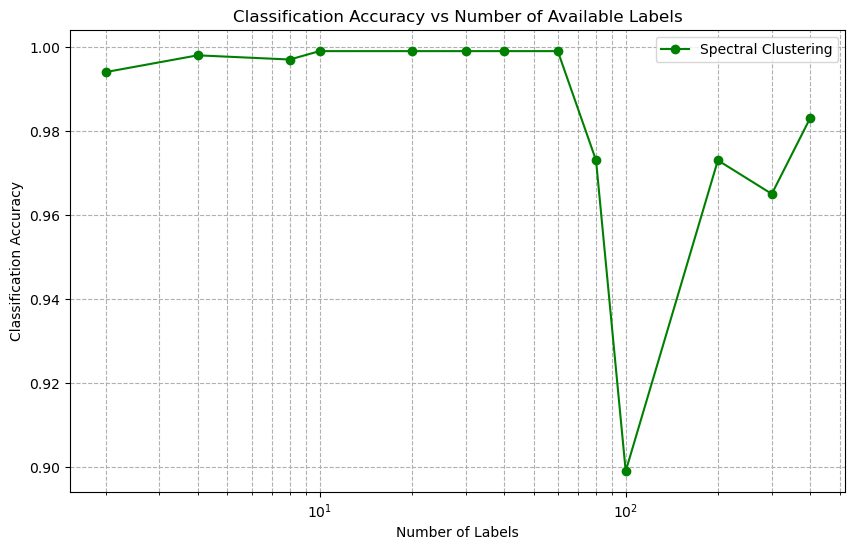

In [14]:
# YOUR CODE TO PRODUCE THE PLOT
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(v_num_labels, acc_spectral_clustering, label='Spectral Clustering', color='green', marker='o')
plt.xlabel('Number of Labels')
plt.ylabel('Classification Accuracy')
plt.title('Classification Accuracy vs Number of Available Labels')
plt.xscale('log')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()



The expected behavior of the plot showing classification accuracy as a function of the number of available labels (clusters) in a spectral clustering context would typically follow a trend that can be broken down into several phases:

Low Number of Labels (Clusters): Initially, when the number of labels (equivalently, the number of clusters) is very low, the classification accuracy is likely to be low as well. This is because with too few clusters, the model cannot capture the complexity and variability of the data adequately. Each cluster might contain multiple classes of data, leading to high misclassification rates.
Increasing Labels Improve Accuracy: As the number of labels (clusters) increases, we expect to see a significant improvement in classification accuracy. This increase happens because more clusters allow for a finer partitioning of the data, which is more likely to align with the true underlying class distributions. During this phase, each cluster is more likely to be homogeneous and correctly represent a single class, thus improving the overall accuracy of the classification.
Optimal Range of Labels (Clusters): There might be a range or a specific number of labels (clusters) where the classification accuracy reaches its peak. This optimal point or range represents a balance where the data is neither under-segmented (too few clusters leading to mixed classes in clusters) nor over-segmented (too many clusters leading to overfitting or unnecessary division of the same class into multiple clusters).
Plateau or Decrease in Accuracy: Beyond the optimal point, adding more labels (clusters) might not lead to significant improvements in accuracy and could even cause a plateau or a decrease. This is because too many clusters can lead to overfitting, where the model starts to capture noise in the data as meaningful distinctions. Furthermore, in a real-world labeling scenario, the increase in the number of clusters means more resources spent on obtaining labels for each cluster, which might not be practically beneficial.
Noise and Data Complexity Considerations: The exact shape and trends in the plot can also be influenced by the noise in the data and its intrinsic complexity. In highly complex or noisy datasets, the accuracy might not follow a smooth curve, and finding an optimal number of clusters could be more challenging.
In summary, the plot is expected to show a curve that initially rises with the number of labels (clusters), reaches an optimum, and then potentially plateaus or declines. The specific behavior and the optimal number of labels depend on the characteristics of the dataset and the effectiveness of the spectral clustering algorithm in capturing the true underlying structure of the data.

Explore the dependence of the classification accuracy of the spectral clustering with the values of `gamma`. 

Choose one of the values of `gamma` explaining the reasons behind this selection. Plot the evolution (as the number of clusters varies) of the accuracy of the Spectral Clustering with that value of `gamma`  and compare these results with those obtained with the SVM for the same number of labels. Including the curves of  spectral clustering and SVM in the same figure can help organize the discussion.

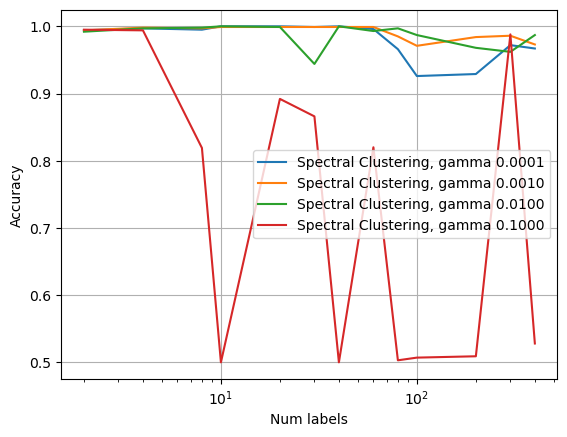

In [17]:
# YOUR CODE TO PRODUCE THE PLOT
from sklearn.metrics import accuracy_score

# Assuming my_spectral_clustering and oracle are defined as before

# Initialize the oracle with the actual dataset
my_oracle = oracle(X, Y)

v_gamma = [1e-4, 1e-3, 1e-2, 1e-1]  # Gamma values to explore
v_num_labels = np.array([2, 4, 8, 10, 20, 30, 40, 60, 80, 100, 200, 300, 400])  # Number of clusters/labels

acc_spectral_clustering = np.empty((len(v_gamma), len(v_num_labels)))  # Storage for accuracies

for ig, gamma in enumerate(v_gamma):
    for ii, n_clusters in enumerate(v_num_labels):
        predictions = my_spectral_clustering(X, my_oracle, n_clusters=n_clusters, gamma=gamma)
        acc_spectral_clustering[ig, ii] = accuracy_score(Y, predictions)

# Plotting
plt.figure()
for ig, gamma in enumerate(v_gamma):
    plt.plot(v_num_labels, acc_spectral_clustering[ig, :], label=f'Spectral Clustering, gamma {gamma:.4f}')
plt.legend()
plt.xlabel('Num labels')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.grid()
plt.show()


In [ ]:
# YOUR DISCUSSION

# 3.- Binary problem even vs odd 

Repeat the analysis with the data included in the files "x_all_even_odd.csv" and "y_all_even_odd.csv". Discuss the separability of the classes in this problem with respect to the separability of the 0 vs. 1 case.

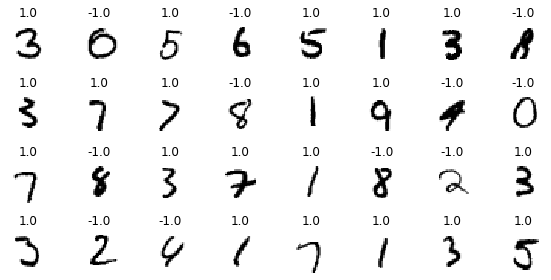

In [7]:
Y = np.loadtxt("y_all_even_odd.csv", 
                       delimiter=",") 
X=np.loadtxt("x_all_even_odd.csv", 
                       delimiter=",")

nrows = 4
ncols = 8
ff,aa = plt.subplots(nrows, ncols,figsize=(8,4))
ii = 0
for rr in range(nrows):
    for cc in range(ncols):
        aa[rr][cc].set_axis_off()
        aa[rr][cc].imshow(X[ii].reshape(28,28), 
                          cmap=plt.cm.gray_r, 
                          interpolation='nearest')
        aa[rr][cc].set_title(repr(Y[ii]))
        ii += 1
ff.tight_layout()  

# SVM

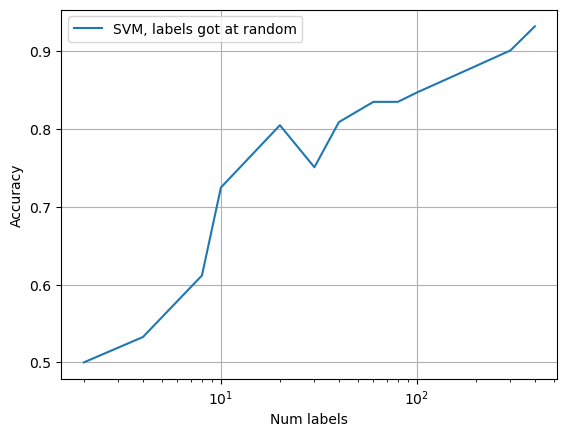

In [28]:
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt


# Load data
Y = pd.read_csv("y_all_even_odd.csv").to_numpy().ravel()
X = pd.read_csv("x_all_even_odd.csv").to_numpy()

# Define parameters
C = 100
gamma = 0.001

# Define the number of labelled samples
v_num_labels = np.array([2, 4, 8, 10, 20, 30, 40, 60, 80, 100, 200, 300, 400])

# Initialize array to store accuracy values
acc_svm_random_label = np.empty(len(v_num_labels))

# Loop through different numbers of labelled samples
for nn, num_data in enumerate(v_num_labels):
    # Randomly select num_data training examples
    idx = np.random.choice(len(X), size=num_data, replace=False)
    X_train = X[idx]
    Y_train = Y[idx]
    
    # Check if both classes are present in the sampled data
    unique_classes = np.unique(Y_train)
    if len(unique_classes) < 2:
        acc_svm_random_label[nn] = 0.5  # Set accuracy to 0.5 for random guessing
    else:
        # Train SVM with the selected training examples
        clf = svm.SVC(kernel='rbf', C=C, gamma=gamma)
        clf.fit(X_train, Y_train)
    
        # Evaluate the SVM using the entire dataset
        accuracy = clf.score(X, Y)
        acc_svm_random_label[nn] = accuracy

# Plot accuracy vs number of labels
plt.figure()
plt.plot(v_num_labels, acc_svm_random_label, label='SVM, labels got at random')
plt.legend()
plt.xlabel('Num labels')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.grid()
plt.show()




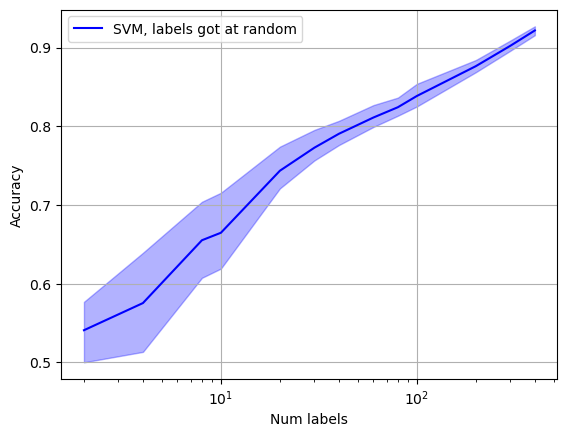

In [29]:
# Define parameters
C = 100
gamma = 0.001

# Define the number of labelled samples
v_num_labels = np.array([2, 4, 8, 10, 20, 30, 40, 60, 80, 100, 200, 300, 400])
NSIM = 100
acc_svm_random_label = np.empty((NSIM, len(v_num_labels)))  # each row is for each of the NSIM simulations

# Loop through different simulations
for sim in range(NSIM):
    # Loop through different numbers of labelled samples
    for nn, num_data in enumerate(v_num_labels):
        # Randomly select num_data training examples
        idx = np.random.choice(len(X), size=num_data, replace=False)
        X_train = X[idx]
        Y_train = Y[idx]

        # Check if both classes are present in the sampled data
        unique_classes = np.unique(Y_train)
        if len(unique_classes) < 2:
            acc_svm_random_label[sim, nn] = 0.5  # Set accuracy to 0.5 for random guessing
        else:
            # Train SVM with the selected training examples
            clf = svm.SVC(kernel='rbf', C=C, gamma=gamma)
            clf.fit(X_train, Y_train)

            # Evaluate the SVM using the entire dataset
            accuracy = clf.score(X, Y)
            acc_svm_random_label[sim, nn] = accuracy

# Plot mean and standard deviation of accuracy
plt.figure()
plt.plot(v_num_labels, np.mean(acc_svm_random_label, axis=0), label='SVM, labels got at random', color='blue')
plt.fill_between(v_num_labels, np.percentile(acc_svm_random_label, 25, axis=0),
                 np.percentile(acc_svm_random_label, 75, axis=0),
                 color='blue', alpha=0.3)
plt.legend()
plt.xlabel('Num labels')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.grid()
plt.show()

# SPECTRAL CLUSTER


In [30]:
from sklearn.cluster import SpectralClustering
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

class oracle(object):
    """
    Simulates an oracle that provides labels for input observations. 
    """
    def __init__(self, x, y):
        self.dim = x.shape[1]
        self.knn = KNeighborsClassifier(n_neighbors=1).fit(x, y)
        
    def get_label(self, x):
        return self.knn.predict(x.reshape(-1, self.dim))
    
def my_spectral_clustering(x, my_oracle, n_clusters=2, gamma=1):
    """
    Implements classification scheme using Spectral Clustering and a very limited number of labels.
    """
    Nt = x.shape[0]
    # Fit Spectral Clustering
    spectral = SpectralClustering(n_clusters=n_clusters, affinity='rbf', gamma=gamma, assign_labels='kmeans', random_state=0)
    cluster_labels = spectral.fit_predict(x)
    
    predictions = np.empty(Nt) # Array to fill with the predicted class for all instances in x
    
    for cc in range(n_clusters):
        # Get the instances that are in cluster cc
        indices = np.where(cluster_labels == cc)[0]
        if len(indices) > 0:
            # Pick one of these instances at random and call it my_x
            random_index = np.random.choice(indices)
            my_x = x[random_index]
            
            # Get the label for my_x from the oracle
            y_cluster = my_oracle.get_label(my_x)
            
            # Fill the positions of the instances in cluster cc in the array predictions with y_cluster
            predictions[indices] = y_cluster
    
    return predictions


In [31]:
v_num_labels = np.array([2,4,8,10,20,30,40,60,80,100,200,300,400]) # number of labelled samples
acc_spectral_clustering = np.empty(len(v_num_labels))
gamma = 0.001
my_oracle = oracle(X,Y)
for ii,n_clusters in enumerate(v_num_labels):
    predictions = my_spectral_clustering(X, my_oracle, n_clusters=n_clusters, gamma=gamma)
    acc_spectral_clustering[ii] = np.mean(predictions == Y)


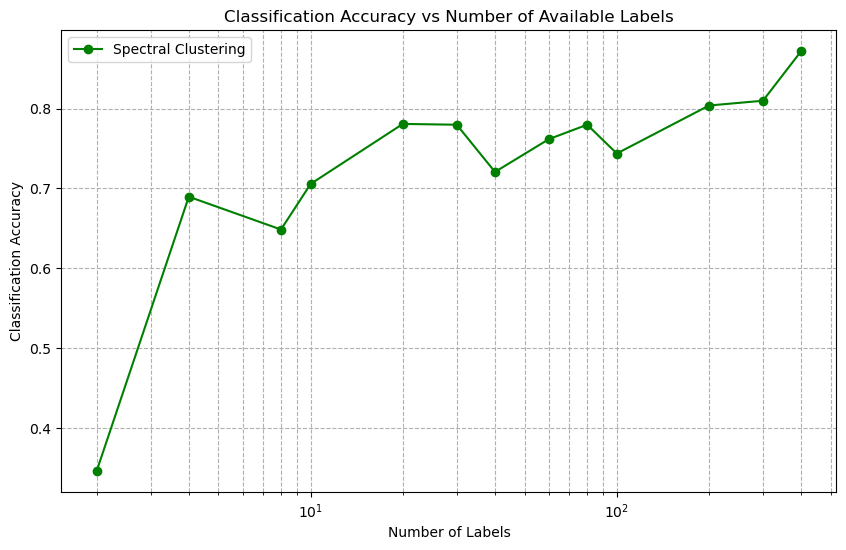

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(v_num_labels, acc_spectral_clustering, label='Spectral Clustering', color='green', marker='o')
plt.xlabel('Number of Labels')
plt.ylabel('Classification Accuracy')
plt.title('Classification Accuracy vs Number of Available Labels')
plt.xscale('log')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

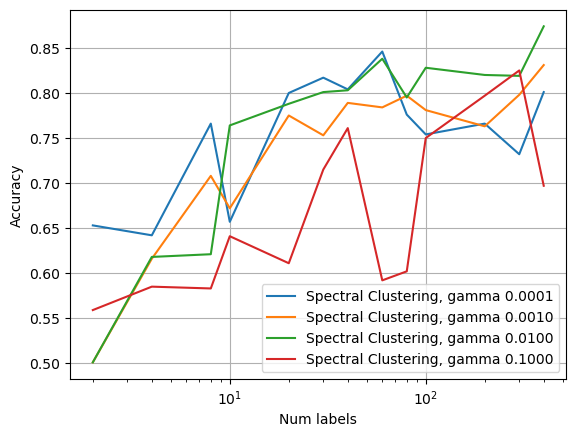

In [33]:
# YOUR CODE TO PRODUCE THE PLOT
from sklearn.metrics import accuracy_score

# Assuming my_spectral_clustering and oracle are defined as before

# Initialize the oracle with the actual dataset
my_oracle = oracle(X, Y)

v_gamma = [1e-4, 1e-3, 1e-2, 1e-1]  # Gamma values to explore
v_num_labels = np.array([2, 4, 8, 10, 20, 30, 40, 60, 80, 100, 200, 300, 400])  # Number of clusters/labels

acc_spectral_clustering = np.empty((len(v_gamma), len(v_num_labels)))  # Storage for accuracies

for ig, gamma in enumerate(v_gamma):
    for ii, n_clusters in enumerate(v_num_labels):
        predictions = my_spectral_clustering(X, my_oracle, n_clusters=n_clusters, gamma=gamma)
        acc_spectral_clustering[ig, ii] = accuracy_score(Y, predictions)

# Plotting
plt.figure()
for ig, gamma in enumerate(v_gamma):
    plt.plot(v_num_labels, acc_spectral_clustering[ig, :], label=f'Spectral Clustering, gamma {gamma:.4f}')
plt.legend()
plt.xlabel('Num labels')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.grid()
plt.show()

# 4.- Final discussion

Put all the results in a same plot and discuss the ranges of number of available labels for which each classification method seems more convenient. Include in the discussion the influence of the separability of the problem.

In [ ]:
# YOUR CODE TO PRODUCE THE PLOTS

In [ ]:
# YOUR DISCUSSION

# Extra 

Check what happens if you train the SVMs with the labelled samples that the spectral clustering uses to label each cluster instead of with the randomly selected labels.

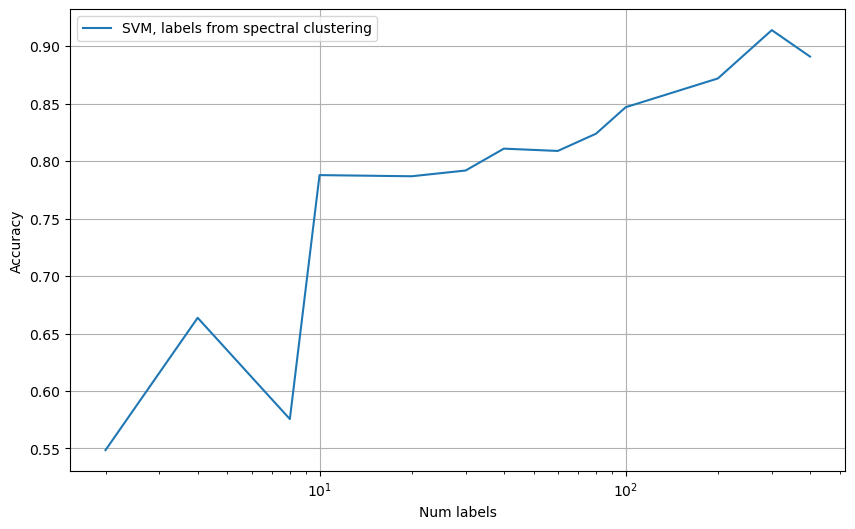

In [34]:
from sklearn import svm
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
Y = pd.read_csv("y_all_even_odd.csv").to_numpy().ravel()
X = pd.read_csv("x_all_even_odd.csv").to_numpy()

# Initialize the oracle
my_oracle = oracle(X, Y)

# SVM Parameters
C = 100
gamma = 0.001

# Number of labeled samples - corresponds to the number of clusters for spectral clustering
v_num_labels = np.array([2, 4, 8, 10, 20, 30, 40, 60, 80, 100, 200, 300, 400])

# Initialize array to store accuracy values for SVM trained on spectral clustering labels
acc_svm_spectral_label = np.empty(len(v_num_labels))

# Loop through the number of clusters
for nn, n_clusters in enumerate(v_num_labels):
    # Perform spectral clustering
    spectral = SpectralClustering(n_clusters=n_clusters, affinity='rbf', gamma=gamma, assign_labels='kmeans', random_state=0)
    cluster_labels = spectral.fit_predict(X)
    
    # Arrays to store training data for SVM
    X_train = np.empty((n_clusters, X.shape[1]))
    Y_train = np.empty(n_clusters)
    
    # Select one sample per cluster to train the SVM
    for cc in range(n_clusters):
        indices = np.where(cluster_labels == cc)[0]
        if len(indices) > 0:
            random_index = np.random.choice(indices)
            X_train[cc] = X[random_index]
            Y_train[cc] = Y[random_index]
    
    # Train SVM with samples selected by spectral clustering
    clf = svm.SVC(kernel='rbf', C=C, gamma=gamma)
    clf.fit(X_train, Y_train)
    
    # Evaluate the SVM on the entire dataset
    accuracy = clf.score(X, Y)
    acc_svm_spectral_label[nn] = accuracy

# Plot accuracy vs number of clusters/labels
plt.figure(figsize=(10, 6))
plt.plot(v_num_labels, acc_svm_spectral_label, label='SVM, labels from spectral clustering')
plt.legend()
plt.xlabel('Num labels')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.grid()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Load data
Y = pd.read_csv("y_all_even_odd.csv").to_numpy().ravel()
X = pd.read_csv("x_all_even_odd.csv").to_numpy()

# Define parameters
C = 100
gamma = 0.001

# Define the number of labelled samples and simulations
v_num_labels = np.array([2, 4, 8, 10, 20, 30, 40, 60, 80, 100, 200, 300, 400])
NSIM = 100

# Initialize array to store accuracy values for each simulation
acc_svm_spectral_label = np.empty((NSIM, len(v_num_labels)))

# Oracle class definition
class oracle:
    def __init__(self, x, y):
        self.dim = x.shape[1]
        self.knn = KNeighborsClassifier(n_neighbors=1).fit(x, y)
        
    def get_label(self, x):
        return self.knn.predict(x.reshape(-1, self.dim))

# Initialize the oracle with the dataset
my_oracle = oracle(X, Y)

# Loop through different simulations
for sim in range(NSIM):
    for nn, n_clusters in enumerate(v_num_labels):
        # Perform spectral clustering
        spectral = SpectralClustering(n_clusters=n_clusters, affinity='rbf', gamma=gamma, assign_labels='kmeans', random_state=sim)
        cluster_labels = spectral.fit_predict(X)

        # Prepare training data for SVM
        X_train = []
        Y_train = []
        
        # Select one sample per cluster to train the SVM
        for cc in range(n_clusters):
            indices = np.where(cluster_labels == cc)[0]
            if len(indices) > 0:
                random_index = np.random.choice(indices)
                X_train.append(X[random_index])
                Y_train.append(Y[random_index])
        
        X_train = np.array(X_train)
        Y_train = np.array(Y_train)
        
        # Check if there are at least two different classes
        if len(np.unique(Y_train)) > 1:
            # Train SVM with samples selected by spectral clustering
            clf = svm.SVC(kernel='rbf', C=C, gamma=gamma)
            clf.fit(X_train, Y_train)

            # Evaluate the SVM on the entire dataset
            accuracy = clf.score(X, Y)
            acc_svm_spectral_label[sim, nn] = accuracy
        else:
            # Not enough classes for a meaningful training
            acc_svm_spectral_label[sim, nn] = 0.5

# Calculate the mean and confidence interval for the accuracies
mean_accuracy = np.mean(acc_svm_spectral_label, axis=0)
confidence_interval = np.std(acc_svm_spectral_label, axis=0) * 1.96 / np.sqrt(NSIM)

# Plot mean accuracy and confidence interval
plt.figure(figsize=(10, 6))
plt.plot(v_num_labels, mean_accuracy, label='SVM, labels from spectral clustering', color='red')
plt.fill_between(v_num_labels, mean_accuracy - confidence_interval, mean_accuracy + confidence_interval, color='red', alpha=0.2)
plt.legend()
plt.xlabel('Number of Labels')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.title('Accuracy of SVM trained on labels from spectral clustering')
plt.grid()
plt.show()

